<a href="https://colab.research.google.com/github/mertmisirli/1_Tensorflow/blob/main/EV_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
urvishahir_electric_vehicle_specifications_dataset_2025_path = kagglehub.dataset_download('urvishahir/electric-vehicle-specifications-dataset-2025')

print('Data source import complete.')


Data source import complete.


In [ ]:
print(urvishahir_electric_vehicle_specifications_dataset_2025_path)

/kaggle/input/electric-vehicle-specifications-dataset-2025


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electric-vehicle-specifications-dataset-2025/electric_vehicles_spec_2025.csv.csv


In [ ]:
df = pd.read_csv('/kaggle/input/electric-vehicle-specifications-dataset-2025/electric_vehicles_spec_2025.csv.csv')

In [ ]:
df.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


In [ ]:
df.columns

Index(['brand', 'model', 'top_speed_kmh', 'battery_capacity_kWh',
       'battery_type', 'number_of_cells', 'torque_nm', 'efficiency_wh_per_km',
       'range_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc',
       'fast_charge_port', 'towing_capacity_kg', 'cargo_volume_l', 'seats',
       'drivetrain', 'segment', 'length_mm', 'width_mm', 'height_mm',
       'car_body_type', 'source_url'],
      dtype='object')

In [ ]:
pip install --upgrade scikit-learn


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 1. Özellik ve hedef değişken seçimi
target = 'range_km'

features = [
    'battery_capacity_kWh',
    'efficiency_wh_per_km',
    'torque_nm',
    'number_of_cells',
    'acceleration_0_100_s',
    'fast_charging_power_kw_dc',
    'seats',
    'towing_capacity_kg',
    'cargo_volume_l',
    'length_mm',
    'width_mm',
    'height_mm',
    'car_body_type',
    'drivetrain',
    'segment'
]

X = df[features]
y = df[target]

# 2. Sayısal ve kategorik sütunları ayır
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# 3. Ön işleme adımları
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 4. Tüm veriyi dönüştüren birleşik pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# 5. Random Forest ile pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# 6. Eğitim/test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Modeli eğit
model.fit(X_train, y_train)

# 8. Tahmin yap
y_pred = model.predict(X_test)

# 9. Performans değerlendirme
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("🚗 Range Prediction Model Performance:")
print(f"MAE: {mae:.2f} km")
print(f"RMSE: {rmse:.2f} km")
print(f"R² Score: {r2:.3f}")


🚗 Range Prediction Model Performance:
MAE: 13.41 km
RMSE: 19.02 km
R² Score: 0.966


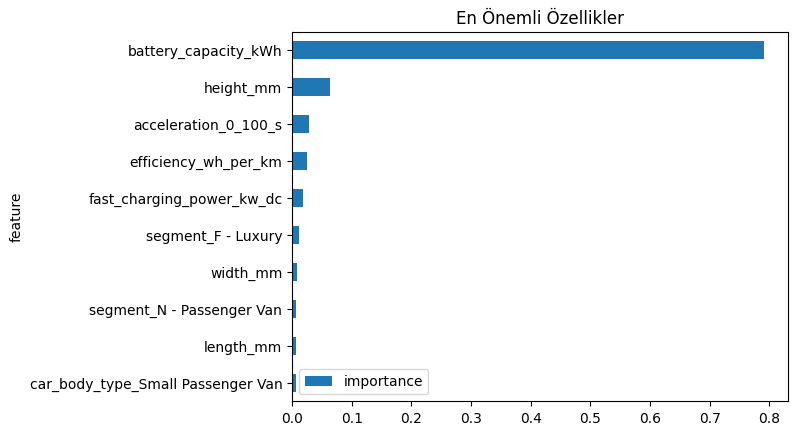

In [ ]:
import matplotlib.pyplot as plt

# Özellik isimlerini elde et
feature_names = model.named_steps['preprocessor'].transformers_[0][2] + \
                list(model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols))

# Önem sıralaması
importances = model.named_steps['regressor'].feature_importances_

# Görselleştir
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importance_df.sort_values(by='importance', ascending=False).head(10).plot(
    kind='barh', x='feature', y='importance', title='En Önemli Özellikler'
)
plt.gca().invert_yaxis()
plt.show()


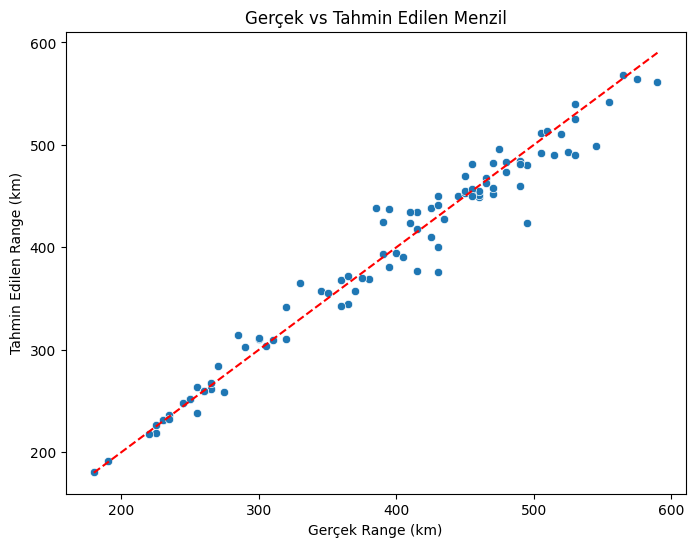

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45 derece çizgi
plt.xlabel("Gerçek Range (km)")
plt.ylabel("Tahmin Edilen Range (km)")
plt.title("Gerçek vs Tahmin Edilen Menzil")
plt.show()


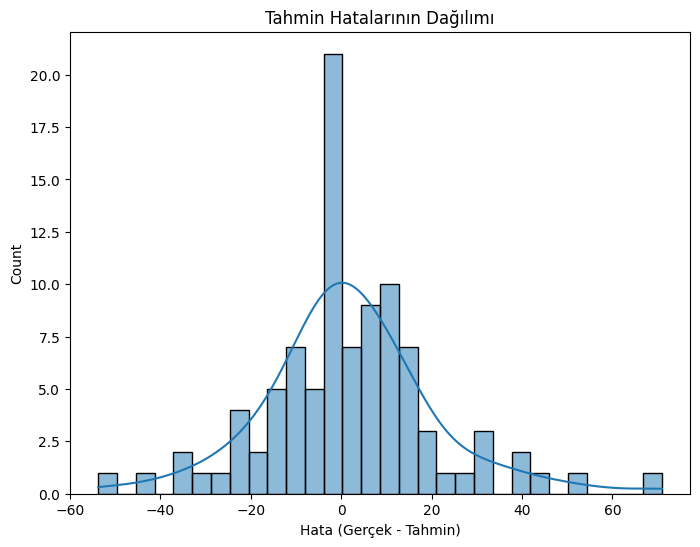

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Hata (Gerçek - Tahmin)")
plt.title("Tahmin Hatalarının Dağılımı")
plt.show()


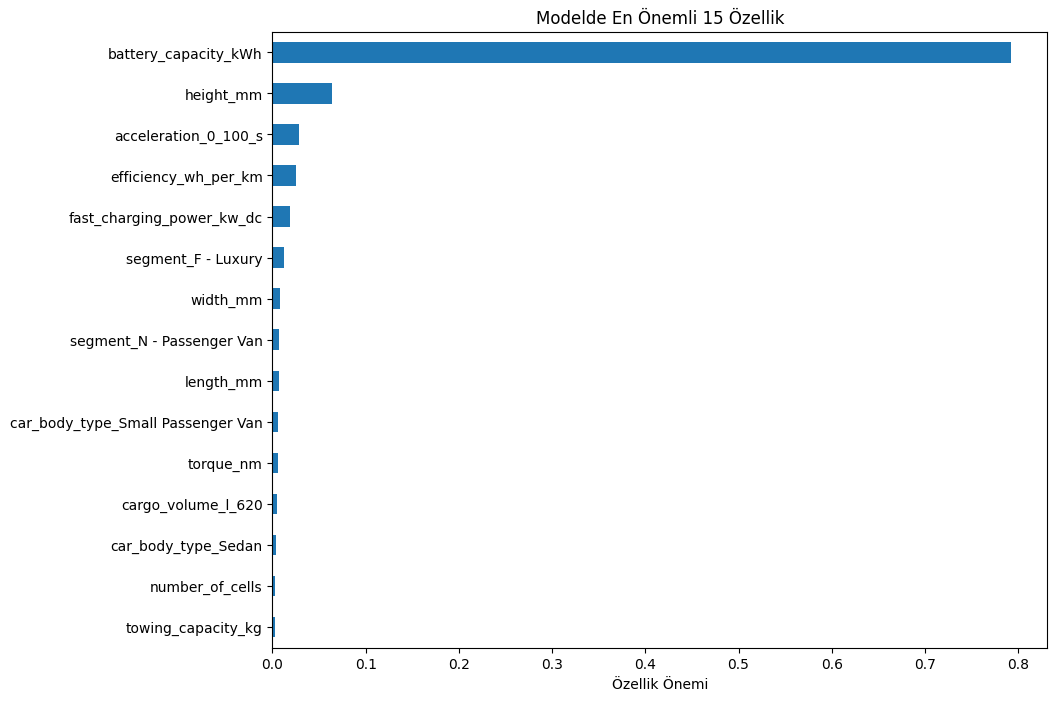

In [ ]:
import numpy as np
import pandas as pd

# Özellik isimlerini al
feature_names_num = numeric_cols
feature_names_cat = model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols)
feature_names = list(feature_names_num) + list(feature_names_cat)

importances = model.named_steps['regressor'].feature_importances_
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=True)

plt.figure(figsize=(10, 8))
feat_imp.tail(15).plot(kind='barh')
plt.title("Modelde En Önemli 15 Özellik")
plt.xlabel("Özellik Önemi")
plt.show()


/tmp/ipython-input-15-715873955.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='brand', y='range_km', ci=None)


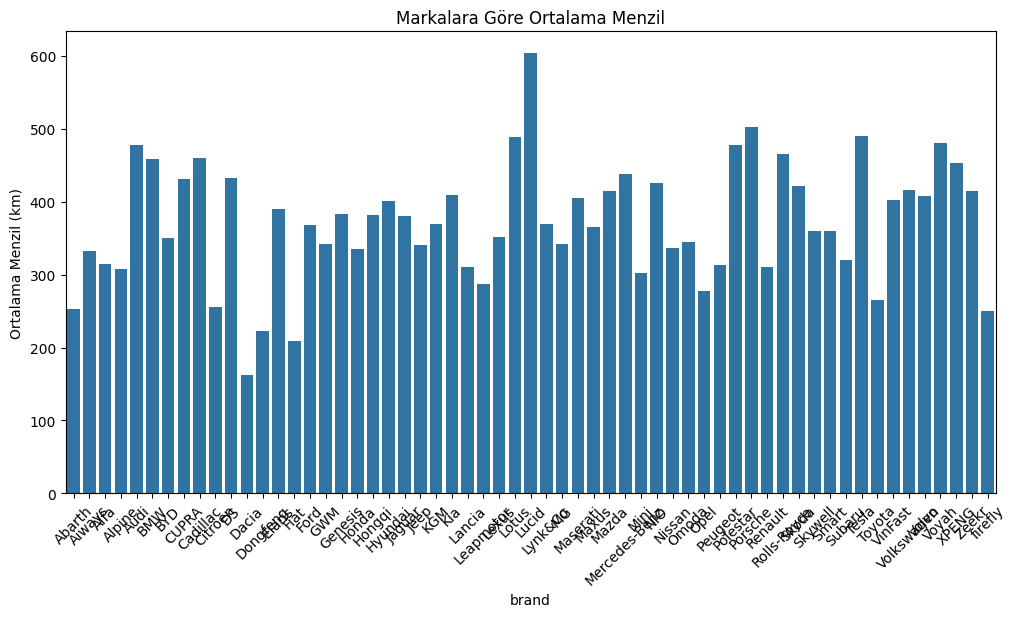

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='brand', y='range_km', ci=None)
plt.xticks(rotation=45)
plt.title("Markalara Göre Ortalama Menzil")
plt.ylabel("Ortalama Menzil (km)")
plt.show()


In [ ]:
top_10_range = df[['brand', 'model', 'range_km']].sort_values(by='range_km', ascending=False).head(10)
print("En Çok Menzili Olan 10 Araç:")
print(top_10_range)


En Çok Menzili Olan 10 Araç:
             brand                            model  range_km
239  Mercedes-Benz                         EQS 450+       685
194          Lucid                Air Grand Touring       665
238  Mercedes-Benz                   EQS 450 4MATIC       655
241  Mercedes-Benz                   EQS 580 4MATIC       640
240  Mercedes-Benz                   EQS 500 4MATIC       640
14            Audi  A6 Sportback e-tron performance       610
15            Audi      A6 Sportback e-tron quattro       590
242  Mercedes-Benz               EQS AMG 53 4MATIC+       585
196          Lucid                      Air Touring       580
342        Porsche                      Taycan Plus       575


In [ ]:
bottom_10_range = df[['brand', 'model', 'range_km']].sort_values(by='range_km', ascending=True).head(10)
print("\nEn Az Menzili Olan 10 Araç:")
print(bottom_10_range)



En Az Menzili Olan 10 Araç:
       brand                    model  range_km
105     Fiat       500e Cabrio 24 kWh       135
107     Fiat    500e Hatchback 24 kWh       135
103     Fiat          500e 3+1 24 kWh       135
99     Dacia       Spring Electric 65       160
98     Dacia       Spring Electric 45       165
316  Peugeot    e-Traveller L3 50 kWh       180
297     Opel  Zafira-e Life L3 50 kWh       180
314  Peugeot    e-Traveller L2 50 kWh       180
409   Toyota    PROACE Verso M 50 kWh       180
89   Citroen   e-SpaceTourer M 50 kWh       180


In [ ]:
df.iloc[[103]]


,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
103,Fiat,500e 3+1 24 kWh,135,21.3,Lithium-ion,108.0,220.0,112,135,9.0,...,0.0,185,4,FWD,B - Compact,3631,1683,1529,Hatchback,https://ev-database.org/car/1726/Fiat-500e-3pl...


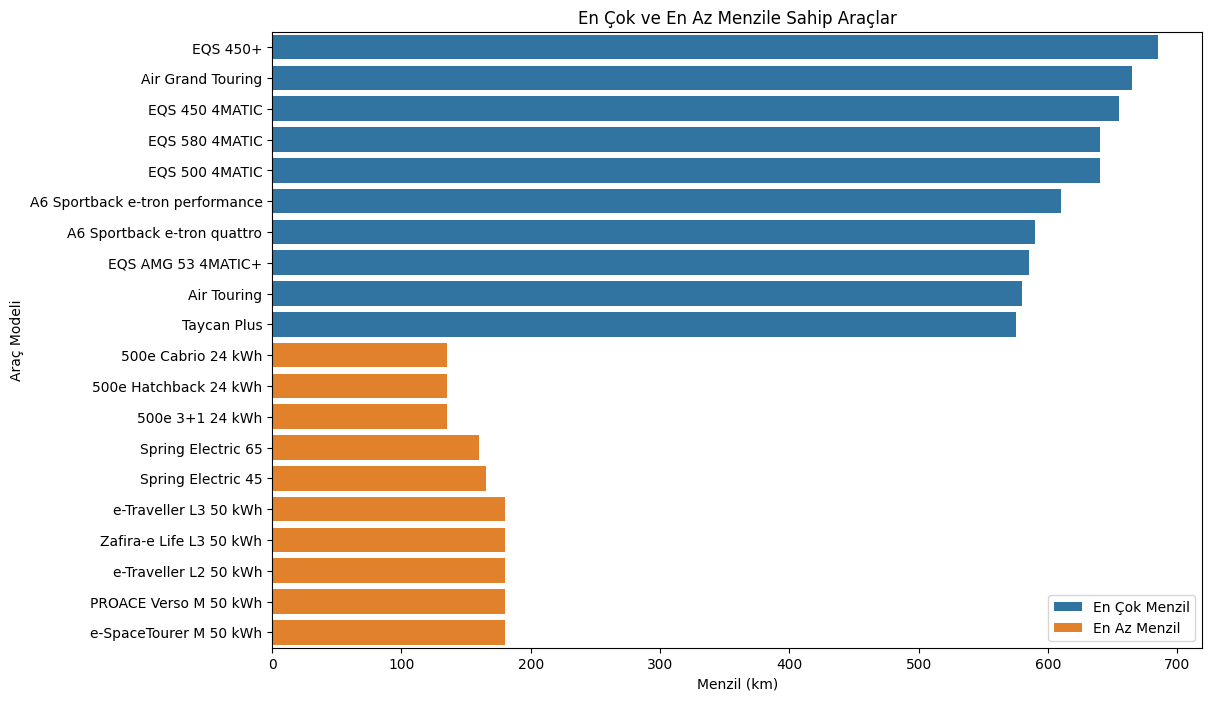

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# En çok ve en az menzil araçları yan yana
compare_df = pd.concat([
    top_10_range.assign(type='En Çok Menzil'),
    bottom_10_range.assign(type='En Az Menzil')
])

plt.figure(figsize=(12, 8))
sns.barplot(data=compare_df, y='model', x='range_km', hue='type', dodge=False)
plt.title("En Çok ve En Az Menzile Sahip Araçlar")
plt.xlabel("Menzil (km)")
plt.ylabel("Araç Modeli")
plt.legend(title="")
plt.show()


In [ ]:
# Yeni araç özellikleri (örnek, kendi aracına göre değiştir)
new_vehicle = {
    'battery_capacity_kWh': 75,
    'efficiency_wh_per_km': 150,
    'torque_nm': 350,
    'number_of_cells': 400,
    'acceleration_0_100_s': 7.2,
    'fast_charging_power_kw_dc': 120,
    'seats': 5,
    'towing_capacity_kg': 1000,
    'cargo_volume_l': 450,
    'length_mm': 4500,
    'width_mm': 1900,
    'height_mm': 1600,
    'car_body_type': 'SUV',
    'drivetrain': 'AWD',
    'segment': 'Premium'
}
import pandas as pd

new_vehicle_df = pd.DataFrame([new_vehicle])

predicted_range = model.predict(new_vehicle_df)
print(f"Tahmin edilen menzil: {predicted_range[0]:.2f} km")


Tahmin edilen menzil: 435.00 km


In [ ]:
"""
🔮 Potansiyel Tahmin (Modelleme) Fikirleri
📈 1. acceleration_0_100_s → Regresyon
0’dan 100 km/s’ye çıkış süresi. Performansı tahmin et.

Kullanılabilecek değişkenler:

torque_nm, drivetrain, battery_capacity_kWh, car_body_type, segment, weight (towing_capacity_kg proxy olabilir).

⚡️ 2. fast_charging_power_kw_dc → Regresyon
Hızlı şarj kapasitesi. Altyapı ve batarya mimarisi ile ilişkili.

Kullanılabilecek değişkenler:

battery_capacity_kWh, battery_type, number_of_cells, brand, segment

🚙 3. drivetrain → Sınıflandırma
AWD / FWD / RWD — Araç çekiş türünü teknik özelliklere göre tahmin et.

Özellikler:

torque_nm, acceleration_0_100_s, car_body_type, segment, seats

📦 4. cargo_volume_l → Regresyon
Bagaj hacmini araç tipi ve ölçülere göre tahmin et.

Özellikler:

car_body_type, length_mm, width_mm, height_mm, segment, seats

📊 5. segment → Sınıflandırma
Teknik verilere göre arabanın segmentini tahmin et (Ekonomik, Premium, Spor, vs.)

Özellikler:

battery_capacity_kWh, range_km, torque_nm, acceleration_0_100_s, car_body_type

🔋 6. battery_type → Sınıflandırma
Teknik verilerden batarya tipini tahmin et.

Özellikler:

battery_capacity_kWh, number_of_cells, charging_power, efficiency_wh_per_km, range_km

🛻 7. towing_capacity_kg → Regresyon
Aracın çekme kapasitesini tahmin et. Genellikle büyük ve güçlü araçlar için önemli.

Özellikler:

torque_nm, car_body_type, segment, seats, drivetrain

🧪 8. Yeni Özellik Üretip Onu Tahmin Et
Örneğin:
🔧 "Weight proxy" = length_mm × width_mm × height_mm
Bu hacimsel büyüklük ile efficiency_wh_per_km ya da acceleration gibi değerleri ilişkilendirebilirsin.

🎯 Ne yapmak istersin?
Belirli bir hedef değişken seçip birlikte bir model kuralım?

Yoksa görselleştirme/EDA tarafında devam mı edelim?

Hazırsan başlayalım 💪
"""

'\n🔮 Potansiyel Tahmin (Modelleme) Fikirleri\n📈 1. acceleration_0_100_s → Regresyon\n0’dan 100 km/s’ye çıkış süresi. Performansı tahmin et.\n\nKullanılabilecek değişkenler:\n\ntorque_nm, drivetrain, battery_capacity_kWh, car_body_type, segment, weight (towing_capacity_kg proxy olabilir).\n\n⚡️ 2. fast_charging_power_kw_dc → Regresyon\nHızlı şarj kapasitesi. Altyapı ve batarya mimarisi ile ilişkili.\n\nKullanılabilecek değişkenler:\n\nbattery_capacity_kWh, battery_type, number_of_cells, brand, segment\n\n🚙 3. drivetrain → Sınıflandırma\nAWD / FWD / RWD — Araç çekiş türünü teknik özelliklere göre tahmin et.\n\nÖzellikler:\n\ntorque_nm, acceleration_0_100_s, car_body_type, segment, seats\n\n📦 4. cargo_volume_l → Regresyon\nBagaj hacmini araç tipi ve ölçülere göre tahmin et.\n\nÖzellikler:\n\ncar_body_type, length_mm, width_mm, height_mm, segment, seats\n\n📊 5. segment → Sınıflandırma\nTeknik verilere göre arabanın segmentini tahmin et (Ekonomik, Premium, Spor, vs.)\n\nÖzellikler:\n\nbatte



Regressyon 1. acceleration_0_100_s[bağlantı metni]

In [ ]:
y = df['acceleration_0_100_s']
X = df[[
    'battery_capacity_kWh',
    'torque_nm',
    'drivetrain',
    'car_body_type',
    'segment',
    'number_of_cells',
    'towing_capacity_kg',
    'seats',
    'length_mm',
    'width_mm',
    'height_mm'
]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Kategorik sütunlar
categorical_cols = ['drivetrain', 'car_body_type', 'segment']

# OneHotEncoder ile pipeline
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Model pipeline
model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)


,steps,"[('preprocessing', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"🚗 Acceleration Prediction Model Performance:")
print(f"MAE: {mae:.2f} s")
print(f"RMSE: {rmse:.2f} s")
print(f"R² Score: {r2:.3f}")


🚗 Acceleration Prediction Model Performance:
MAE: 0.47 s
RMSE: 0.64 s
R² Score: 0.949


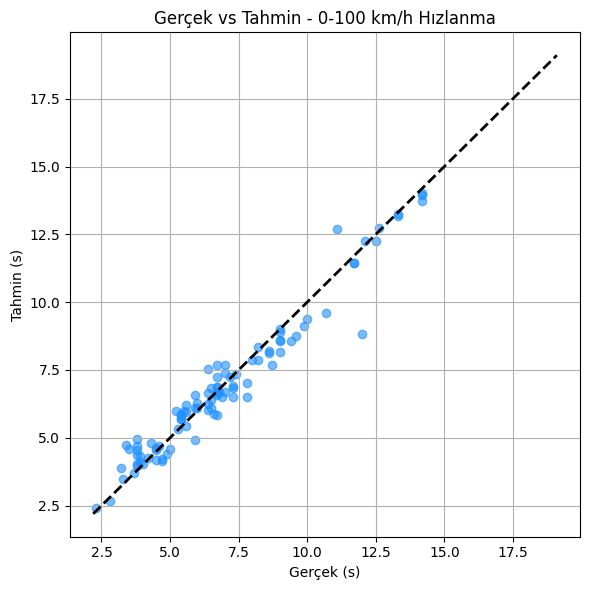

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='dodgerblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Gerçek (s)")
plt.ylabel("Tahmin (s)")
plt.title("Gerçek vs Tahmin - 0-100 km/h Hızlanma")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
new_vehicle = {
    'battery_capacity_kWh': 100,
    'torque_nm': 300,
    'drivetrain': 'AWD',
    'car_body_type': 'SUV',
    'segment': 'Premium',
    'number_of_cells': 600,
    'towing_capacity_kg': 1500,
    'seats': 5,
    'length_mm': 5000,
    'width_mm': 2000,
    'height_mm': 1700
}


In [ ]:
import pandas as pd

new_vehicle_df = pd.DataFrame([new_vehicle])

predicted_acceleration = model.predict(new_vehicle_df)[0]
print(f"🚗 Tahmini 0–100 km/s Hızlanma Süresi: {predicted_acceleration:.2f} saniye")


🚗 Tahmini 0–100 km/s Hızlanma Süresi: 8.16 saniye
